In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image
%matplotlib inline 
# or plt.show() to make vizez appear embedded in the notebook

In [2]:
file1 = pd.read_csv('/Users/marcsoler/Documents/GitHub/Ironhack_lab_work/Case Studies/Week 1/H4A/data/file1.csv')
file2 = pd.read_csv('/Users/marcsoler/Documents/GitHub/Ironhack_lab_work/Case Studies/Week 1/H4A/data/file2.txt', sep='\t')
file3 = pd.read_excel('/Users/marcsoler/Documents/GitHub/Ironhack_lab_work/Case Studies/Week 1/H4A/data/file3.xlsx')
file4 = pd.read_excel('/Users/marcsoler/Documents/GitHub/Ironhack_lab_work/Case Studies/Week 1/H4A/data/file4.xlsx')

# File description

In [3]:
file1.describe()

,CONTROLN,IC1,IC4,HVP1,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,TARGET_D
count,1007.000000,1007.000000,1006.000000,1007.000000,1007.000000,1007.000000,1006.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,98913.029791,352.015889,445.059642,16.261172,6.847071,55.630586,401.658052,400.022840,11.863404,37.747766,2555.362463,16.026604
std,58306.879885,173.937638,178.115476,29.464477,9.333689,21.593999,182.024618,168.901139,7.829965,213.010617,2069.953954,14.586646
min,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.361111,0.000000,0.000000,1.000000
25%,44930.500000,238.500000,325.000000,0.000000,1.000000,41.000000,283.000000,286.000000,7.285714,0.000000,0.000000,10.000000
50%,101113.000000,319.000000,406.000000,1.000000,4.000000,57.000000,364.500000,361.000000,10.000000,1.000000,2501.000000,13.920000
75%,151559.000000,421.500000,527.000000,14.000000,9.000000,74.000000,474.750000,478.000000,14.500000,2.000000,4308.500000,20.000000
max,191779.000000,1500.000000,1263.000000,99.000000,73.000000,96.000000,1500.000000,1185.000000,89.444444,4002.000000,8305.000000,200.000000


In [4]:
file1.tail(10)
#check for fitness of index number at the end.

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
997,57151,KY,F,875,311,326.0,0,7746,3,29,326.0,326,15.900000,0,3601,R1,26.0
998,71425,MI,M,713,300,364.0,0,16833,2,88,313.0,323,6.000000,1,4401,T2,7.0
999,127823,TX,F,258,64,74.0,0,4236,0,94,60.0,93,5.450000,2,2301,C3,6.0
1000,150739,CA,U,1951,556,625.0,44,17208,10,66,578.0,619,9.681818,2,5410,S1,12.0
1001,41384,FL,F,556,318,352.0,0,11779,16,22,358.0,320,9.428571,28,5107,S3,12.0
1002,114721,OK,NaN,1040,472,656.0,0,26962,2,56,609.0,579,11.666667,0,0,C2,15.0
1003,149152,CA,M,4507,842,962.0,95,54642,17,50,1004.0,893,20.000000,1,4401,S1,20.0
1004,959,IA,F,586,349,465.0,1,15304,1,77,413.0,404,7.300000,0,4404,C2,10.0
1005,179563,WA,male,842,420,494.0,2,12894,41,24,419.0,476,16.400000,1,5001,S2,23.0
1006,41243,FL,F,556,246,330.0,0,10272,2,56,277.0,292,9.818182,2,2201,S2,12.0


In [5]:
file2.tail(10)

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
1005,161726,CA,F,2453,438,475,86,15707,16,45,451,436,5.812500,0,4601,T1,7.0
1006,125986,TX,M,533,246,308,1,10096,3,75,276,287,13.375000,0,4610,T2,17.0
1007,185394,MI,F,647,285,338,0,12910,7,80,317,300,8.916667,2,2702,S2,5.0
1008,43799,FL,F,1044,366,499,15,22427,8,35,318,458,13.166667,2,5801,T2,20.0
1009,161838,CA,F,1953,304,380,47,13811,25,43,353,337,13.500000,0,4212,C2,14.0
1010,161838,CA,F,1953,304,380,47,13811,25,43,353,337,13.500000,0,4212,C2,14.0
1011,161838,CA,F,1953,304,380,47,13811,25,43,353,337,13.500000,0,4212,C2,14.0
1012,138311,AZ,Female,1708,437,684,36,29098,7,19,586,551,9.769231,2,1403,S1,20.0
1013,123469,TX,M,561,493,540,1,16623,5,68,529,506,5.200000,0,0,T2,5.0
1014,135341,AZ,Female,700,205,295,0,12713,9,12,221,276,12.857143,0,0,C2,12.0


In [6]:
file2['GENDER'].unique()

array(['M', 'F', 'feamale', nan, 'U', 'Male', 'male', 'J', 'female',
       'Female'], dtype=object)

In [7]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONTROLN  1007 non-null   int64  
 1   STATE     1007 non-null   object 
 2   GENDER    967 non-null    object 
 3   HV1       1005 non-null   object 
 4   IC1       1007 non-null   int64  
 5   IC4       1006 non-null   float64
 6   HVP1      1007 non-null   int64  
 7   IC5       1007 non-null   object 
 8   POBC1     1007 non-null   int64  
 9   POBC2     1007 non-null   int64  
 10  IC2       1006 non-null   float64
 11  IC3       1007 non-null   int64  
 12  AVGGIFT   1007 non-null   float64
 13  TCODE     1007 non-null   int64  
 14  DOB       1007 non-null   int64  
 15  DOMAIN    1007 non-null   object 
 16  TARGET_D  1007 non-null   float64
dtypes: float64(4), int64(8), object(5)
memory usage: 133.9+ KB


In [8]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONTROLN  1015 non-null   int64  
 1   STATE     1015 non-null   object 
 2   GENDER    985 non-null    object 
 3   HV1       1015 non-null   int64  
 4   IC1       1015 non-null   int64  
 5   IC4       1015 non-null   int64  
 6   HVP1      1015 non-null   int64  
 7   IC5       1015 non-null   int64  
 8   POBC1     1015 non-null   int64  
 9   POBC2     1015 non-null   int64  
 10  IC2       1015 non-null   int64  
 11  IC3       1015 non-null   int64  
 12  AVGGIFT   1015 non-null   float64
 13  TCODE     1015 non-null   int64  
 14  DOB       1015 non-null   int64  
 15  DOMAIN    1015 non-null   object 
 16  TARGET_D  1015 non-null   float64
dtypes: float64(2), int64(12), object(3)
memory usage: 134.9+ KB


In [9]:
file3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONTROLN  1000 non-null   int64  
 1   STATE     1000 non-null   object 
 2   GENDER    964 non-null    object 
 3   HV1       1000 non-null   int64  
 4   IC1       1000 non-null   int64  
 5   IC4       1000 non-null   int64  
 6   HVP1      1000 non-null   int64  
 7   IC5       1000 non-null   int64  
 8   POBC1     1000 non-null   int64  
 9   POBC2     1000 non-null   int64  
 10  IC2       1000 non-null   int64  
 11  IC3       1000 non-null   int64  
 12  AVGGIFT   1000 non-null   float64
 13  TCODE     1000 non-null   int64  
 14  DOB       1000 non-null   int64  
 15  DOMAIN    1000 non-null   object 
 16  TARGET_D  1000 non-null   float64
dtypes: float64(2), int64(12), object(3)
memory usage: 132.9+ KB


In [10]:
file4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONTROLN  1006 non-null   int64  
 1   STATE     1006 non-null   object 
 2   GENDER    976 non-null    object 
 3   HV1       1006 non-null   object 
 4   IC1       1006 non-null   int64  
 5   IC4       1006 non-null   int64  
 6   HVP1      1006 non-null   int64  
 7   IC5       1006 non-null   int64  
 8   POBC1     1006 non-null   int64  
 9   POBC2     1006 non-null   int64  
 10  IC2       1006 non-null   int64  
 11  IC3       1006 non-null   int64  
 12  AVGGIFT   1006 non-null   float64
 13  TCODE     1006 non-null   int64  
 14  DOB       1006 non-null   int64  
 15  DOMAIN    1006 non-null   object 
 16  TARGET_D  1006 non-null   float64
dtypes: float64(2), int64(11), object(4)
memory usage: 133.7+ KB


## notes to return to later
- missing a lot of gender values
- lots of zeroes showing in columns
- dtypes discrepancies, especially in CONTROLN
- occsasional missing values

# Merging the dataframes with concat()

In [11]:
df = pd.concat([file1, file2, file3, file4], axis=0, ignore_index=True)
#after doing concat or removing rows we need to reset the index. In this case, we did it in the concat function.
#the above is the same as .reset_index()

In [12]:
df.head()

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONTROLN  4028 non-null   int64  
 1   STATE     4028 non-null   object 
 2   GENDER    3892 non-null   object 
 3   HV1       4026 non-null   object 
 4   IC1       4028 non-null   int64  
 5   IC4       4027 non-null   float64
 6   HVP1      4028 non-null   int64  
 7   IC5       4028 non-null   object 
 8   POBC1     4028 non-null   int64  
 9   POBC2     4028 non-null   int64  
 10  IC2       4027 non-null   float64
 11  IC3       4028 non-null   int64  
 12  AVGGIFT   4028 non-null   float64
 13  TCODE     4028 non-null   int64  
 14  DOB       4028 non-null   int64  
 15  DOMAIN    4028 non-null   object 
 16  TARGET_D  4028 non-null   float64
dtypes: float64(4), int64(8), object(5)
memory usage: 535.1+ KB


# Basic cleaning of the dataframe

## Changing the headers into lower case

In [14]:
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower())
df.columns = cols
df.columns

Index(['controln', 'state', 'gender', 'hv1', 'ic1', 'ic4', 'hvp1', 'ic5',
       'pobc1', 'pobc2', 'ic2', 'ic3', 'avggift', 'tcode', 'dob', 'domain',
       'target_d'],
      dtype='object')

## Drop useless columns

In [15]:
dfnew = df.drop(['controln', 'pobc2'], axis = 1)

In [16]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     4028 non-null   object 
 1   gender    3892 non-null   object 
 2   hv1       4026 non-null   object 
 3   ic1       4028 non-null   int64  
 4   ic4       4027 non-null   float64
 5   hvp1      4028 non-null   int64  
 6   ic5       4028 non-null   object 
 7   pobc1     4028 non-null   int64  
 8   ic2       4027 non-null   float64
 9   ic3       4028 non-null   int64  
 10  avggift   4028 non-null   float64
 11  tcode     4028 non-null   int64  
 12  dob       4028 non-null   int64  
 13  domain    4028 non-null   object 
 14  target_d  4028 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 472.2+ KB


## Renaming columns to be more meaninful

In [17]:
new_names = {
    'hv1': 'medianhv',
    'ic5': 'percapita',
}
df.rename(columns=new_names, inplace=True)
df.head()

,controln,state,gender,medianhv,ic1,ic4,hvp1,percapita,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


## Looking into datatypes
- controln should be object
- hv1 should be float
- ic5 should be float
- dob should be date

In [18]:
df.dtypes

controln       int64
state         object
gender        object
medianhv      object
ic1            int64
ic4          float64
hvp1           int64
percapita     object
pobc1          int64
pobc2          int64
ic2          float64
ic3            int64
avggift      float64
tcode          int64
dob            int64
domain        object
target_d     float64
dtype: object

In [19]:
df['medianhv'] = pd.to_numeric(df['medianhv'], errors='coerce')
df['percapita'] = pd.to_numeric(df['percapita'], errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   controln   4028 non-null   int64  
 1   state      4028 non-null   object 
 2   gender     3892 non-null   object 
 3   medianhv   4018 non-null   float64
 4   ic1        4028 non-null   int64  
 5   ic4        4027 non-null   float64
 6   hvp1       4028 non-null   int64  
 7   percapita  4022 non-null   float64
 8   pobc1      4028 non-null   int64  
 9   pobc2      4028 non-null   int64  
 10  ic2        4027 non-null   float64
 11  ic3        4028 non-null   int64  
 12  avggift    4028 non-null   float64
 13  tcode      4028 non-null   int64  
 14  dob        4028 non-null   int64  
 15  domain     4028 non-null   object 
 16  target_d   4028 non-null   float64
dtypes: float64(6), int64(8), object(3)
memory usage: 535.1+ KB


## Searching for and eliminating duplicates

In [21]:
df = df.drop_duplicates()
# without any arguments, it drops full duplicated rows.

# Filter and query data in a dataframe

In [22]:
# Method 1: query
df.query('gender == "F" & state=="CA"')

,controln,state,gender,medianhv,ic1,ic4,hvp1,percapita,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
8,173223,CA,F,NaN,184,250.0,0,8708.0,2,63,206.0,235,8.818182,0,1801,T2,10.0
9,157988,CA,F,NaN,593,617.0,61,17838.0,7,62,NaN,619,6.666667,28,0,S1,10.0
11,186272,CA,F,3515.0,521,588.0,97,20068.0,11,54,565.0,549,8.640000,2,3401,U1,10.0
36,154245,CA,F,596.0,164,190.0,0,5273.0,23,57,168.0,181,16.500000,2,4304,R1,15.0
40,10145,CA,F,2362.0,613,678.0,74,21179.0,9,61,632.0,655,8.928571,2,5401,C1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,159721,CA,F,683.0,194,333.0,1,10267.0,9,64,216.0,295,11.363636,0,3811,T3,35.0
4002,157826,CA,F,2387.0,394,447.0,76,17331.0,18,46,399.0,446,8.045455,0,0,U4,15.0
4004,4638,CA,F,2473.0,585,611.0,86,21343.0,4,48,586.0,610,25.843750,0,2401,S1,25.0
4010,142600,CA,F,919.0,89,210.0,3,4825.0,41,37,193.0,154,25.000000,0,4301,U4,25.0


In [23]:
# Method 2: using tilde symbol ~ to do inverse filtering
female_genders = ['F', 'f', 'FEMALE','female', 'feamale']
df[~df.gender.isin(female_genders)]

,controln,state,gender,medianhv,ic1,ic4,hvp1,percapita,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
0,44060,FL,M,NaN,392,520.0,7,21975.0,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.0,365,473.0,0,19387.0,1,89,415.0,410,5.666667,0,0,T2,7.0
3,21885,NC,M,NaN,401,413.0,7,14014.0,1,74,407.0,399,27.277778,0,2208,T2,38.0
5,100640,IL,M,764.0,457,501.0,1,16022.0,2,75,477.0,480,25.571429,1,6104,S2,30.0
7,119038,TX,M,890.0,519,560.0,0,17872.0,2,46,525.0,551,6.175000,1002,0,C1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,68618,MI,M,726.0,485,509.0,0,17020.0,3,85,495.0,516,17.225806,1,3312,T1,40.0
4017,1646,CA,M,675.0,163,230.0,1,7083.0,13,57,209.0,194,7.562500,1,4711,C3,10.0
4019,6443,FL,M,595.0,252,274.0,0,11132.0,8,11,263.0,262,14.692308,1,2501,T2,20.0
4021,151504,CA,M,2666.0,535,653.0,63,24745.0,22,45,609.0,612,12.333333,1,4401,S1,21.0


In [24]:
# Method 3: iloc (by index)
df.iloc[4:6] #plus rows, columns, lists as parameters

,controln,state,gender,medianhv,ic1,ic4,hvp1,percapita,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
4,190108,FL,F,995.0,252,348.0,0,17991.0,5,6,280.0,316,6.000000,28,0,C2,5.0
5,100640,IL,M,764.0,457,501.0,1,16022.0,2,75,477.0,480,25.571429,1,6104,S2,30.0


In [25]:
# Method 4: loc (by name)
df.loc[df['gender'] == 'F']

,controln,state,gender,medianhv,ic1,ic4,hvp1,percapita,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
2,43333,FL,F,725.0,301,436.0,3,18837.0,11,17,340.0,361,4.111111,0,2501,C2,5.0
4,190108,FL,F,995.0,252,348.0,0,17991.0,5,6,280.0,316,6.000000,28,0,C2,5.0
8,173223,CA,F,NaN,184,250.0,0,8708.0,2,63,206.0,235,8.818182,0,1801,T2,10.0
9,157988,CA,F,NaN,593,617.0,61,17838.0,7,62,NaN,619,6.666667,28,0,S1,10.0
10,141720,NV,F,1569.0,673,781.0,22,25775.0,3,44,672.0,785,13.000000,28,5401,T1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,26009,GA,F,899.0,396,501.0,1,15973.0,6,44,417.0,479,8.000000,2,6411,S2,15.0
4013,77441,WI,F,725.0,316,376.0,0,11623.0,1,86,354.0,335,7.666667,0,5701,T2,7.0
4015,117326,TX,F,1715.0,554,837.0,34,31480.0,3,54,750.0,626,6.916667,0,4105,U1,10.0
4018,66762,MI,F,632.0,279,388.0,2,12653.0,1,71,336.0,339,8.533333,0,0,0,5.0


In [26]:
# Method 5: using brackets and criteria (allows to mix string and number filters)
df[(df['state']=='FL')&(df['gender']=='M')&(df['ic1']>300)]

,controln,state,gender,medianhv,ic1,ic4,hvp1,percapita,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
0,44060,FL,M,NaN,392,520.0,7,21975.0,6,16,430.0,466,28.000000,1,1901,C2,100.0
175,11494,FL,M,1229.0,469,544.0,21,17313.0,2,30,502.0,507,8.400000,2,6501,T1,5.0
203,38820,FL,M,1332.0,357,497.0,2,21444.0,14,15,411.0,422,9.576923,2,1306,C1,20.0
220,191779,FL,M,1432.0,636,772.0,24,35544.0,0,44,693.0,680,25.000000,1,2701,0,150.0
242,39479,FL,M,1287.0,479,616.0,7,20795.0,15,35,508.0,567,4.105769,2,3306,C2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,37575,FL,M,1938.0,400,606.0,50,34430.0,56,10,482.0,500,55.000000,1,0,U1,50.0
3904,40421,FL,M,1270.0,363,519.0,15,17548.0,8,26,471.0,429,6.269231,1002,3911,C1,5.0
3935,14552,FL,M,1518.0,449,523.0,26,17518.0,11,39,469.0,494,10.700000,0,4906,T1,16.0
3984,36776,FL,M,653.0,319,379.0,0,12869.0,11,35,360.0,358,9.500000,1,2601,S3,20.0


In [27]:
# Method 6: .filter()
df.filter(items=['state', 'gender'], axis=1)

,state,gender
0,FL,M
1,IL,M
2,FL,F
3,NC,M
4,FL,F
...,...,...
4018,MI,F
4019,FL,M
4020,CA,F
4021,CA,M


# Dealing with NULLS

In [28]:
#snapshot table for handling nulls
nulls_df = pd.DataFrame(round(df.isna().sum()/len(df), 4) * 100)
nulls_df = nulls_df.rename(columns={'index':'header', 0: 'prop_nulls'})
nulls_df.index.name = 'header'
nulls_df

,prop_nulls
header,
controln,0.00
state,0.00
gender,3.32
medianhv,0.25
ic1,0.00
ic4,0.02
hvp1,0.00
percapita,0.15
pobc1,0.00


## Filling the gender column with 'unknown'

In [29]:
df['gender'] = df['gender'].fillna('Unknown')
# check it has worked: data[data['gender'].isna()==True]

In [30]:
df['gender'].value_counts()

F          1955
M          1466
Unknown     133
male        126
female      106
Female       75
U            68
Male         33
J            23
feamale      15
A             1
Name: gender, dtype: int64

## Filling the medianhv with the column's median

In [31]:
# First we compute the median of the column and set is as a variable
med_hv1 = df['medianhv'].median()
# Then, we fill the nulls with the computed median
df['medianhv'] = df['medianhv'].fillna(med_hv1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4001 entries, 0 to 4022
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   controln   4001 non-null   int64  
 1   state      4001 non-null   object 
 2   gender     4001 non-null   object 
 3   medianhv   4001 non-null   float64
 4   ic1        4001 non-null   int64  
 5   ic4        4000 non-null   float64
 6   hvp1       4001 non-null   int64  
 7   percapita  3995 non-null   float64
 8   pobc1      4001 non-null   int64  
 9   pobc2      4001 non-null   int64  
 10  ic2        4000 non-null   float64
 11  ic3        4001 non-null   int64  
 12  avggift    4001 non-null   float64
 13  tcode      4001 non-null   int64  
 14  dob        4001 non-null   int64  
 15  domain     4001 non-null   object 
 16  target_d   4001 non-null   float64
dtypes: float64(6), int64(8), object(3)
memory usage: 562.6+ KB


## Dropping the rest of NULL values

In [33]:
# data = data.dropna(subset=['percapita'])
df = df.dropna()
# After dropping nulls, always reset index
df.reset_index(drop=True, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   controln   3993 non-null   int64  
 1   state      3993 non-null   object 
 2   gender     3993 non-null   object 
 3   medianhv   3993 non-null   float64
 4   ic1        3993 non-null   int64  
 5   ic4        3993 non-null   float64
 6   hvp1       3993 non-null   int64  
 7   percapita  3993 non-null   float64
 8   pobc1      3993 non-null   int64  
 9   pobc2      3993 non-null   int64  
 10  ic2        3993 non-null   float64
 11  ic3        3993 non-null   int64  
 12  avggift    3993 non-null   float64
 13  tcode      3993 non-null   int64  
 14  dob        3993 non-null   int64  
 15  domain     3993 non-null   object 
 16  target_d   3993 non-null   float64
dtypes: float64(6), int64(8), object(3)
memory usage: 530.4+ KB


# Data quality issues - standardise the values in...

In [35]:
# gender
df['gender'] = df['gender'].str.title() 
#we eliminate some of the options by standardising the capitalisation.
df['gender'].value_counts()

F          1947
M          1466
Female      181
Male        159
Unknown     133
U            68
J            23
Feamale      15
A             1
Name: gender, dtype: int64

In [36]:
# It can be done with a dictionary or a logical approach (if statements)
def clean_gender(x):
    if x in ['M', 'Male']:
        return 'Male'
    elif x in ['F', 'Female', 'Feamale']:
        return 'Female'
    else:
        return 'Unknown'

In [37]:
# list + map
df['gender'] = list(map(clean_gender, df['gender']))

In [38]:
df['gender'].value_counts()

Female     2143
Male       1625
Unknown     225
Name: gender, dtype: int64

# Lambda + list(map)

In [39]:
# Lambda is an anonymous function (no name). It's quick, but don't use if complex
y = lambda x: x+2
y(100)

102

In [40]:
# Using lambda to upper case a column
map(lambda x: x.upper(), df['gender'])
# The same could be done with string, a function, a for loop or a list comprehension

In [41]:
# square lambda to these numbers
num = [1, 2, 3, 4, 5, 6]
sq = lambda x: x**2
map(sq, num)

# list comprehension
sq_num = [x**2 for x in num]

# Date and time

In [42]:
import time
from datetime import date
datae = pd.read_csv('/Users/marcsoler/Documents/GitHub/BCNDATA0122/ClassMaterials/Week1/Day3pandas/air_quality_no2_long.csv')


In [43]:
datae.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [44]:
# Parse date.utc field into DATE TYPE
datae['date.utc'] = pd.to_datetime(datae['date.utc'], errors='coerce') #to_date if we don't have time info.
datae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [45]:
# Isolate parts of the date - pull out the day, month, hour...
datae['weekday'] = pd.DatetimeIndex(datae['date.utc']).weekday
datae.head(10)

,city,country,date.utc,location,parameter,value,unit,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,3
5,Paris,FR,2019-06-20 19:00:00+00:00,FR04014,no2,25.3,µg/m³,3
6,Paris,FR,2019-06-20 18:00:00+00:00,FR04014,no2,23.9,µg/m³,3
7,Paris,FR,2019-06-20 17:00:00+00:00,FR04014,no2,23.2,µg/m³,3
8,Paris,FR,2019-06-20 16:00:00+00:00,FR04014,no2,19.0,µg/m³,3
9,Paris,FR,2019-06-20 15:00:00+00:00,FR04014,no2,19.3,µg/m³,3


In [46]:
datae['weekday'] = datae['date.utc'].dt.strftime('%a')
datae.head()

,city,country,date.utc,location,parameter,value,unit,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,Fri
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,Thu
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,Thu
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,Thu
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,Thu


In [47]:
# Creating a new column for date only and another for the hour
datae['date'] = datae['date.utc'].dt.strftime('%d/%m/%Y')
datae['hour'] = datae['date.utc'].dt.strftime('%H')

In [48]:
datae.head()

,city,country,date.utc,location,parameter,value,unit,weekday,date,hour
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,Fri,21/06/2019,00
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,Thu,20/06/2019,23
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,Thu,20/06/2019,22
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,Thu,20/06/2019,21
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,Thu,20/06/2019,20


In [49]:
date.today()

datetime.date(2022, 1, 21)

In [50]:
time.localtime()

time.struct_time(tm_year=2022, tm_mon=1, tm_mday=21, tm_hour=15, tm_min=22, tm_sec=58, tm_wday=4, tm_yday=21, tm_isdst=0)

# Exploring and describing data
- Understanding the data in terms of the spread, variation, noisiness  
- Mean, median, mode: what they mean in each column  
- Understanding the frequency of values  
- Bucketing

**Useful functions:**
describe()  
info()  
shape  
unique()  
value_counts()  
tail()  
head()  
nunique()  
nsmallest() nlargest()  
groupby().agg()  

In [51]:
datae.describe(include=[object]) # Includes the object data type.

,city,country,location,parameter,unit,weekday,date,hour
count,2068,2068,2068,2068,2068,2068,2068,2068
unique,3,3,3,1,1,7,46,24
top,Paris,FR,FR04014,no2,µg/m³,Sun,19/05/2019,01
freq,1004,1004,1004,2068,2068,315,72,109


In [52]:
# groupby pivot fields () and a value column [literally value here] and then we can apply some calculations.
city_summary = datae.groupby('city')['value'].mean().sort_values()
city_summary

city
London       24.777090
Antwerpen    25.778947
Paris        27.740538
Name: value, dtype: float64

In [53]:
hour_summary = datae.groupby('hour')['value'].mean().sort_values()
hour_summary

hour
13    21.008235
12    21.029762
11    21.275294
14    21.737647
10    22.602326
04    22.979518
03    23.242683
02    23.558511
15    23.840000
16    24.972619
09    26.071591
01    26.125688
17    26.691667
05    27.070732
18    27.089412
00    27.955294
19    28.143529
08    29.138636
20    29.372941
06    30.635632
21    30.973256
23    31.189412
07    31.346591
22    32.451282
Name: value, dtype: float64

In [54]:
type(hour_summary)

pandas.core.series.Series

In [55]:
city_hour_summary = datae.groupby(['city','hour']).agg('mean').sort_values(by=['city', 'value'])
city_hour_summary.tail(30)

value
city   hour           
London 16    28.951220
       22    28.969697
       20    29.121951
       19    29.560976
       17    30.073171
       18    30.121951
Paris  14    17.772093
       13    17.958140
       12    18.571429
       15    18.854762
       11    20.461905
       16    21.266667
       17    23.585714
       10    23.658140
       18    24.204762
       03    25.234211
       02    25.964286
       19    26.635714
       04    27.257895
       01    27.433333
       20    29.707143
       09    30.076744
       00    31.683333
       21    33.237209
       23    34.288095
       22    35.400000
       05    35.534211
       08    36.458140
       06    40.102381
       07    40.569767

In [56]:
type(city_hour_summary)

pandas.core.frame.DataFrame

# Visual descriptive analysis (Exploratory Descriptive Analysis)

<AxesSubplot:>

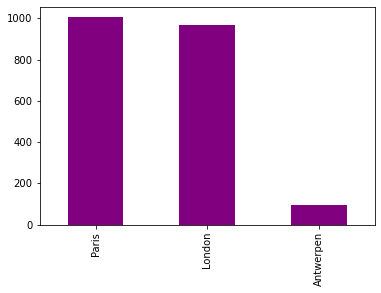

In [57]:
# default python plotting
datae['city'].value_counts().plot(kind='bar', color='purple')

<AxesSubplot:>

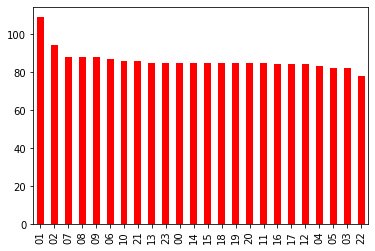

In [58]:
datae['hour'].value_counts().plot(kind='bar', color='red')

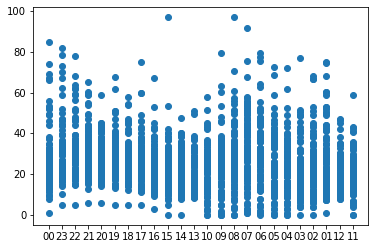

In [59]:
plt.scatter(x=datae['hour'], y=datae['value'])

In [60]:
# data from hours is not ordered, because the hours are in string format. Changing them to numeric:
datae['hour'] = pd.to_numeric(datae['hour'], errors='coerce')

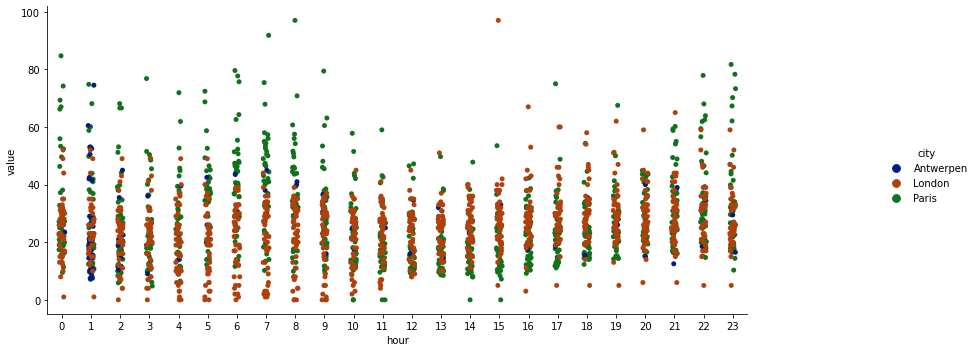

In [61]:
ax = sns.catplot(data=datae, x='hour', y='value', hue='city', palette='dark', hue_order=['Antwerpen', 'London', 'Paris'])
# Adjusting plot size
ax.fig.set_figwidth(15)

In [62]:
paris = datae.query('city=="Paris"')

Text(0, 0.5, 'no2 level')

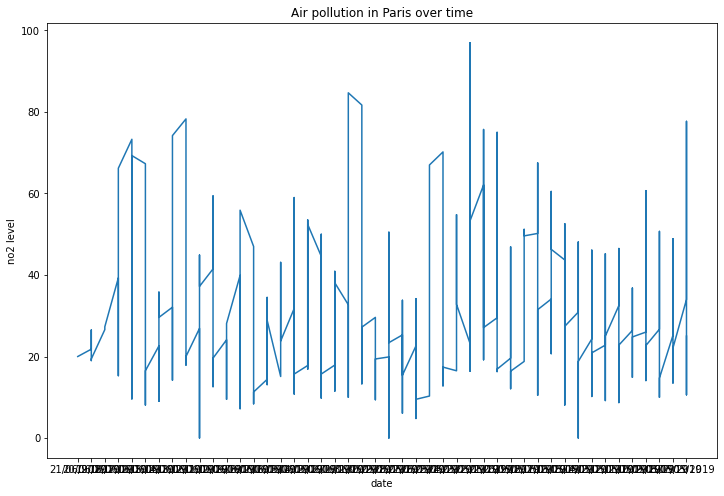

In [63]:
plt.figure(figsize=(12,8))
plt.plot(paris['date'], paris['value'])
plt.title('Air pollution in Paris over time')
plt.xlabel('date')
plt.ylabel('no2 level')

# Distribution - types and tips

##### when data is continuous we can visually analyse the spread, as well as relationships between variables, to learn lessons about the sample data and the population it ultimately represents

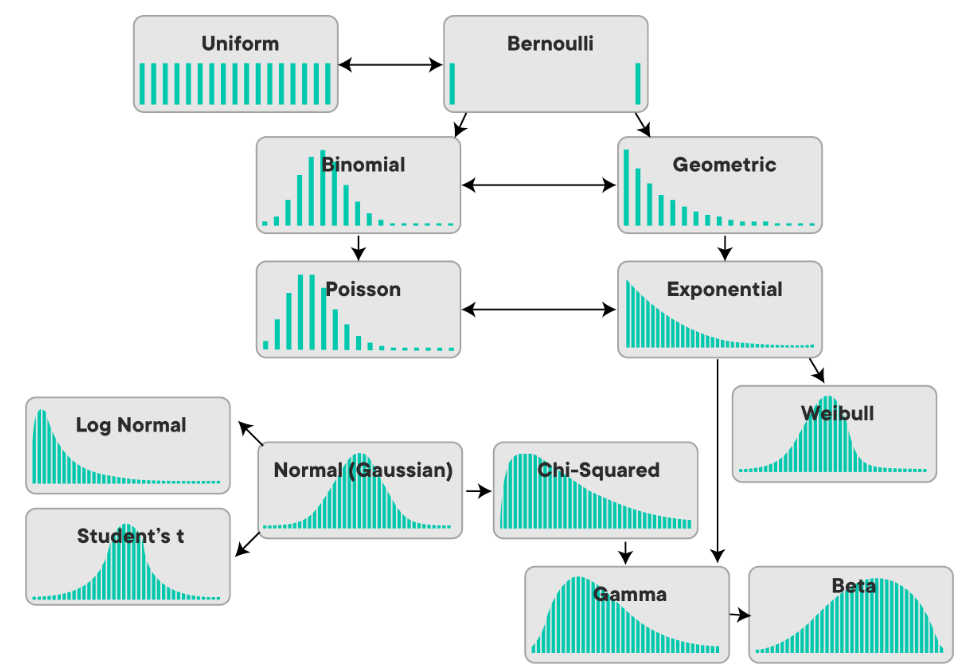

In [64]:
Image("Imagesfornotebook/diff distributions.png")

## Histograms 

A histogram provides a visual representation of the distribution of a dataset: location, spread and skewness of the data; it also helps to visualize whether the distribution is symmetric or skewed left or right. In addition, if it is unimodal, bimodal or multimodal. It can also show any outliers or gaps in the data. In brief, a histogram summarizes the distribution properties of a continuous numerical variable.

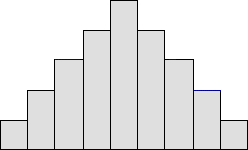

In [65]:
Image("Imagesfornotebook/normal.gif") # the normal or gaussian distribution

Rules:
* symmetric bell shape.
* mean and median are equal; both located at the center of the distribution.
* approx 68% percent of the data falls within 1 standard deviation of the mean.
* (hint for next week - machine learning algorithms love Gaussian)

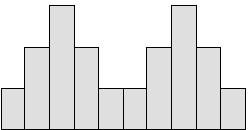

In [66]:
Image("Imagesfornotebook/bimodal.gif")

Rules: 

* two visible peaks
* may indicate two systems or sources of data
* recommended to split the two peaks out and deal with them separately 
* this can be handled during data wrangling 

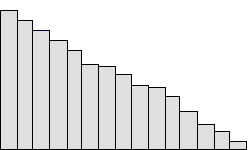

In [67]:
Image("Imagesfornotebook/skew-right.gif")

A distribution skewed to the right is said to be positively skewed.

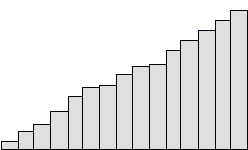

In [68]:
Image("Imagesfornotebook/skew-left.gif")

A distribution skewed to the left is said to be negatively skewed

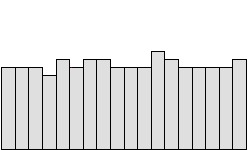

In [69]:
Image("Imagesfornotebook/uniform.gif")

A uniform distribution, as shown below, provides little information.
It may describe a distribution which has several modes (peaks). 
If your histogram has this shape, check to see if several sources of variation have been combined. If so, analyze them separately. If multiple sources of variation do not seem to be the cause of this pattern, different groupings can be tried to see if a more useful pattern results. 

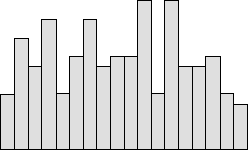

In [70]:
Image("Imagesfornotebook/random.gif")

This type has no apparent pattern.  Like the uniform distribution, it may describe a distribution that has several modes (peaks), hiding several combined sources of variation or would benefit from groupings.

Lets download some penguin data from [here](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data)

In [71]:
#create a sub data frame of the numeric variables "dfnum"
#that you want to analyse next to eachother
data_num = df._get_numeric_data()
data_num.info()
df2 = df[['medianhv', 'ic1', 'ic2', 'ic3', 'ic4', 'percapita', 'hvp1', 'avggift', 'target_d']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   controln   3993 non-null   int64  
 1   medianhv   3993 non-null   float64
 2   ic1        3993 non-null   int64  
 3   ic4        3993 non-null   float64
 4   hvp1       3993 non-null   int64  
 5   percapita  3993 non-null   float64
 6   pobc1      3993 non-null   int64  
 7   pobc2      3993 non-null   int64  
 8   ic2        3993 non-null   float64
 9   ic3        3993 non-null   int64  
 10  avggift    3993 non-null   float64
 11  tcode      3993 non-null   int64  
 12  dob        3993 non-null   int64  
 13  target_d   3993 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 436.9 KB


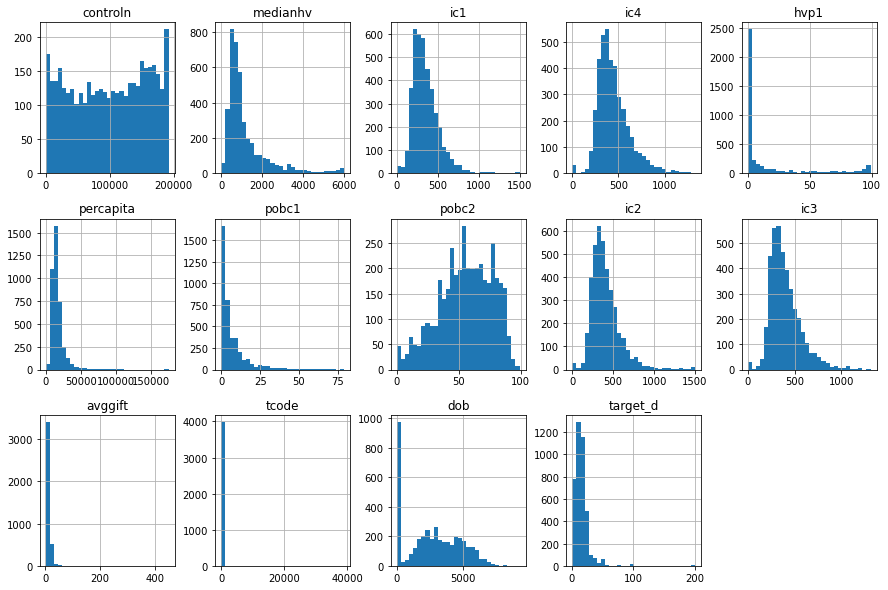

In [72]:
#create all histograms 
data_num.hist(bins=30, figsize=(15, 10), layout=(3, 5));

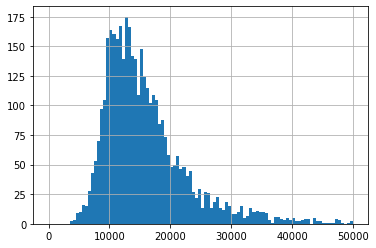

In [73]:
df['percapita'].hist(range=(1,50000), bins=100);

TASK : summarise in bullet points what type of distribution we see for each variable and what we can interpret from them:

* avggift: in our sample, we can see that most donors give less than $50. We have potential outliers up to $400. (the distribution is heavily skewed to the right).
* mismatch between expected donation and historical donations.
* medianhv: there's some variation in household value neighbourhoods - some expensive ones, the majority are similar, less than 200k med household value.
* consistency in distribution between ic1, 2, 3 and 4. Fairly normal and skewed to the right. theyre also very similar as constructs.
* per capita income, there are outliers, but otherwise seems normal.

## Scatter plots 

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.

Identification of correlational relationships are common with scatter plots. In these cases, we want to know, if we were given a particular horizontal value, what a good prediction would be for the vertical value. You will often see the variable on the horizontal axis denoted an independent variable, and the variable on the vertical axis the dependent variable. Relationships between variables can be described in many ways: positive or negative, strong or weak, linear or nonlinear.

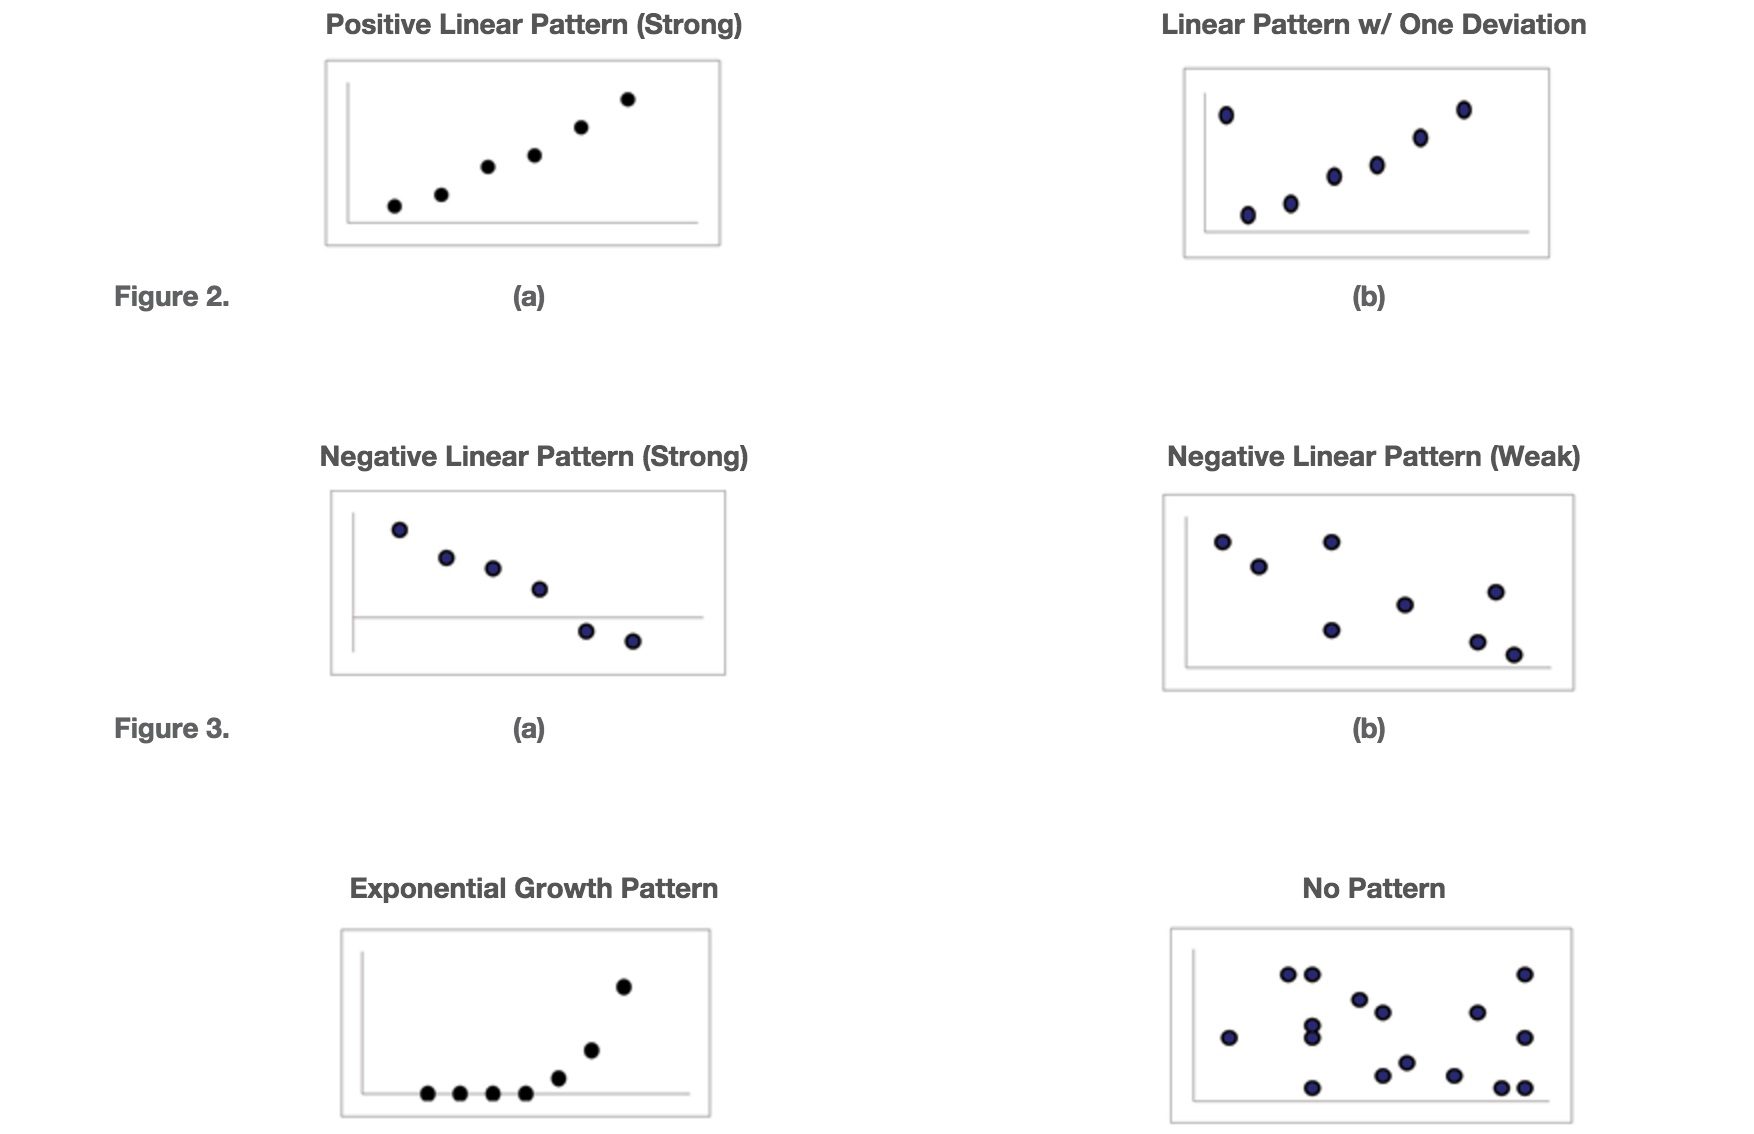

In [74]:
Image("Imagesfornotebook/scatter.png")

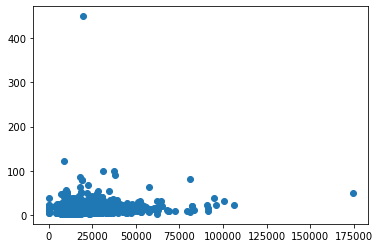

In [75]:
plt.scatter(x=df['percapita'], y=df['avggift']);

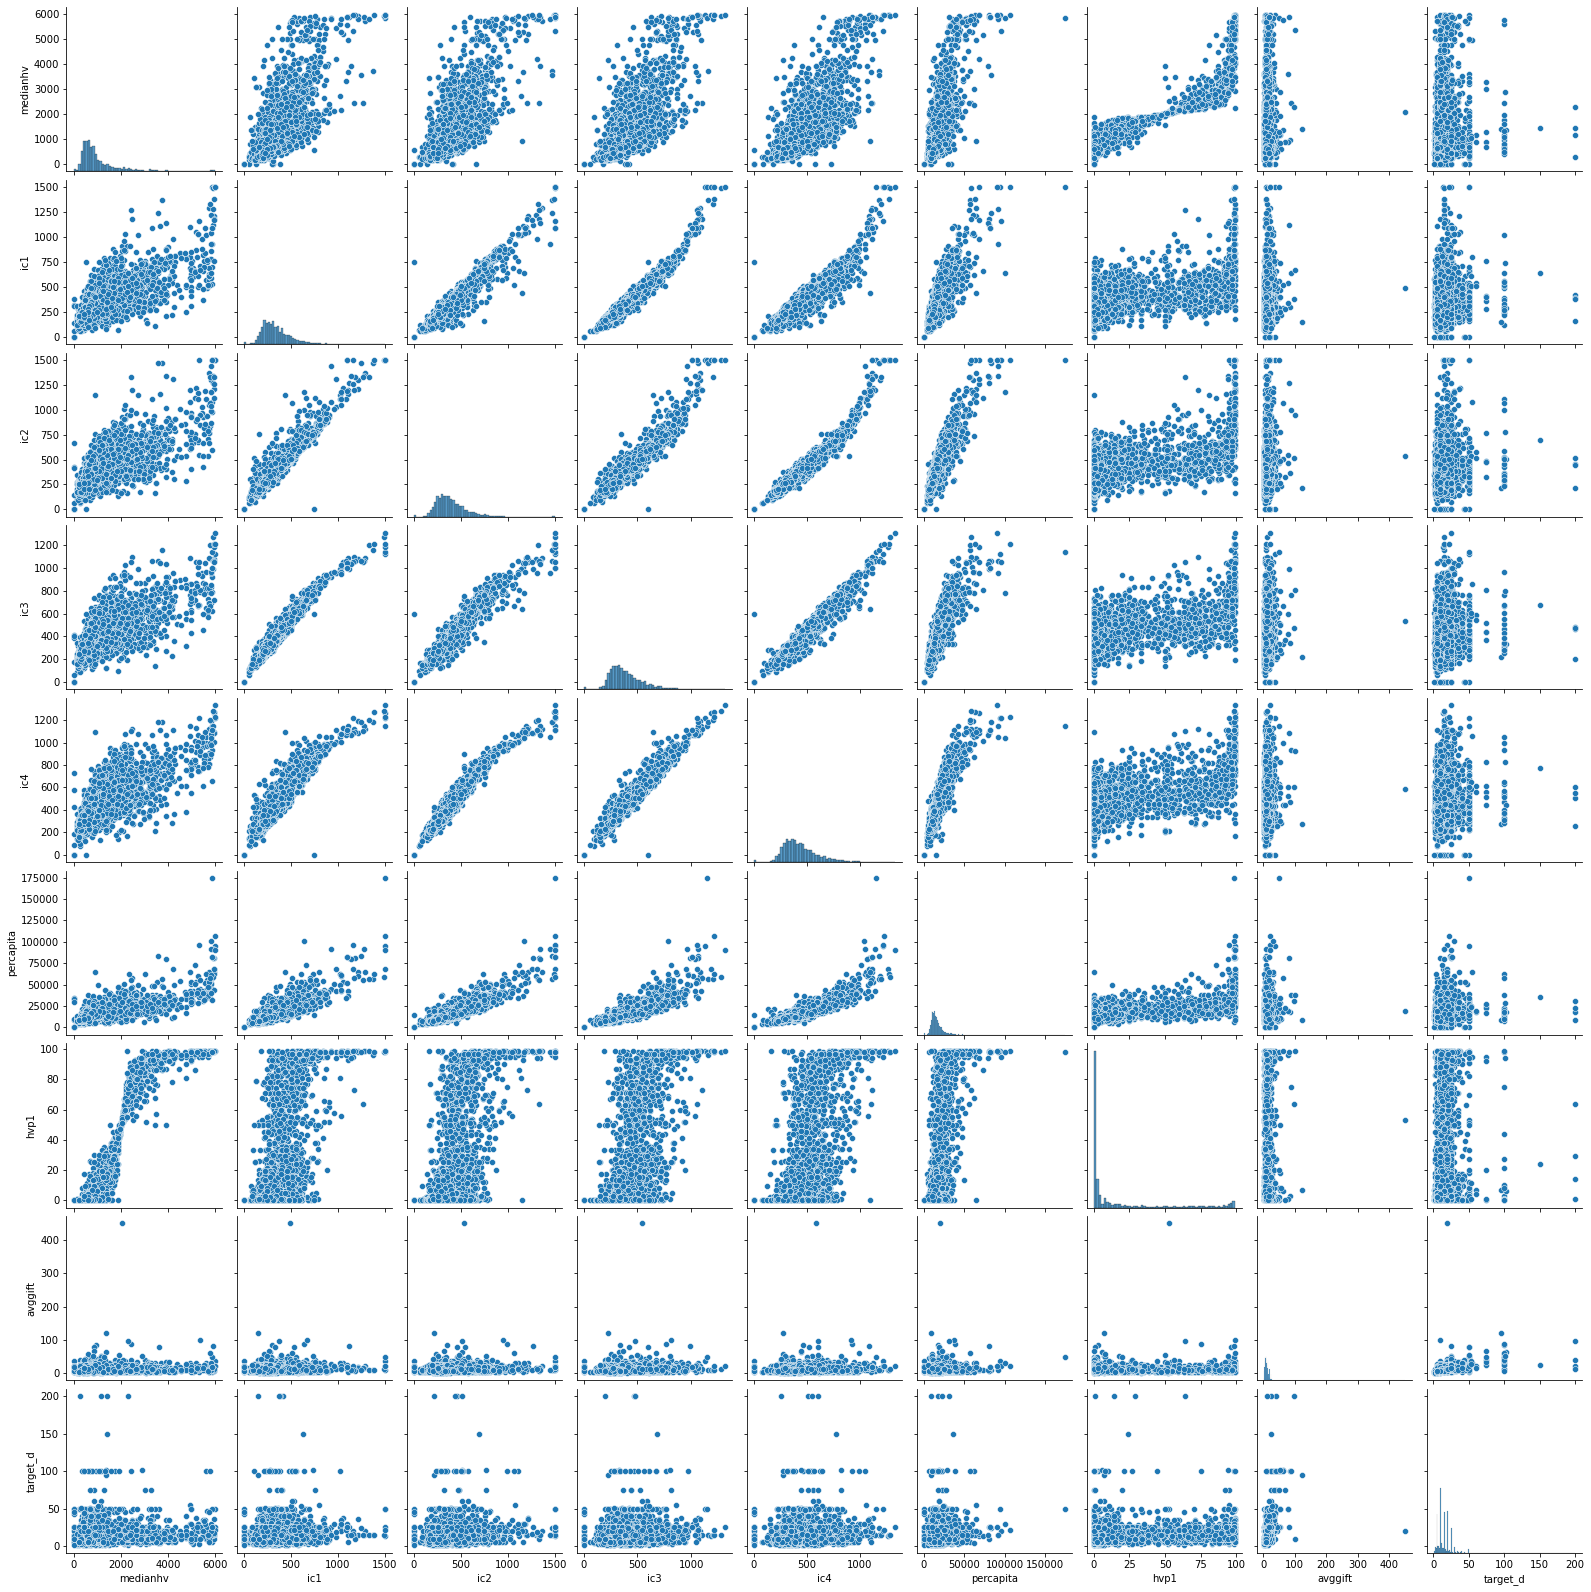

In [76]:
# all scatter plots as a matrix using pairplot
sns.pairplot(df2);

TASK summarise in bullet points what important relationships you observe see and what you can interpret/infer from them:

* All ic variables have a positive relationship between them. They're highly correlated.
* medianhv seems to positively correlate with all ic variables (lots of dispersion), percapita and hvp1 (sigmoid).
* percapita seems to slightly and positively correlate with the ic variables and the medianhv.
* hvp1 has a positive association with the medianhv.
* avggift doesn't seem to correlate with any other variable.
* Flags for business case: the important stuff: avggift not correlating, less correl than expected between target_d and the financial demographic variables.


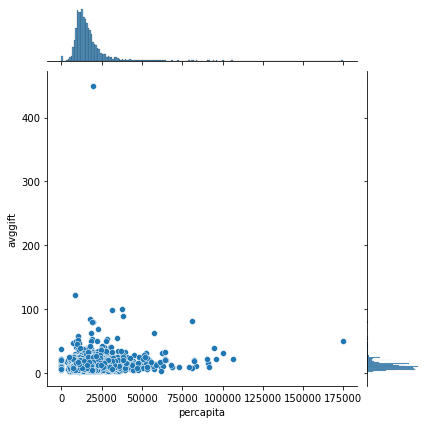

In [77]:
#focusing on one relationship - you could also use different visual methods 
# example jointplot 
sns.jointplot(data=df, y='avggift', x='percapita');

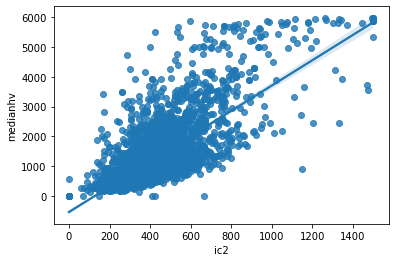

In [78]:
#if you think there is a correlation, plot a trend line with the scatter 
# example regplot 

sns.regplot(data=df, x='ic2', y='medianhv');

### Quick health warning on scatter plots - correlation v causation 

This is not so much an issue with creating a scatter plot as it is an issue with its interpretation. 

Simply because we observe a relationship between two variables in a scatter plot, it does not mean that changes in one variable are responsible for changes in the other. This gives rise to the common phrase in statistics that correlation does not imply causation. 

It is possible that the observed relationship is driven by some third variable that affects both of the plotted variables, that the causal link is reversed, or that the pattern is simply coincidental.

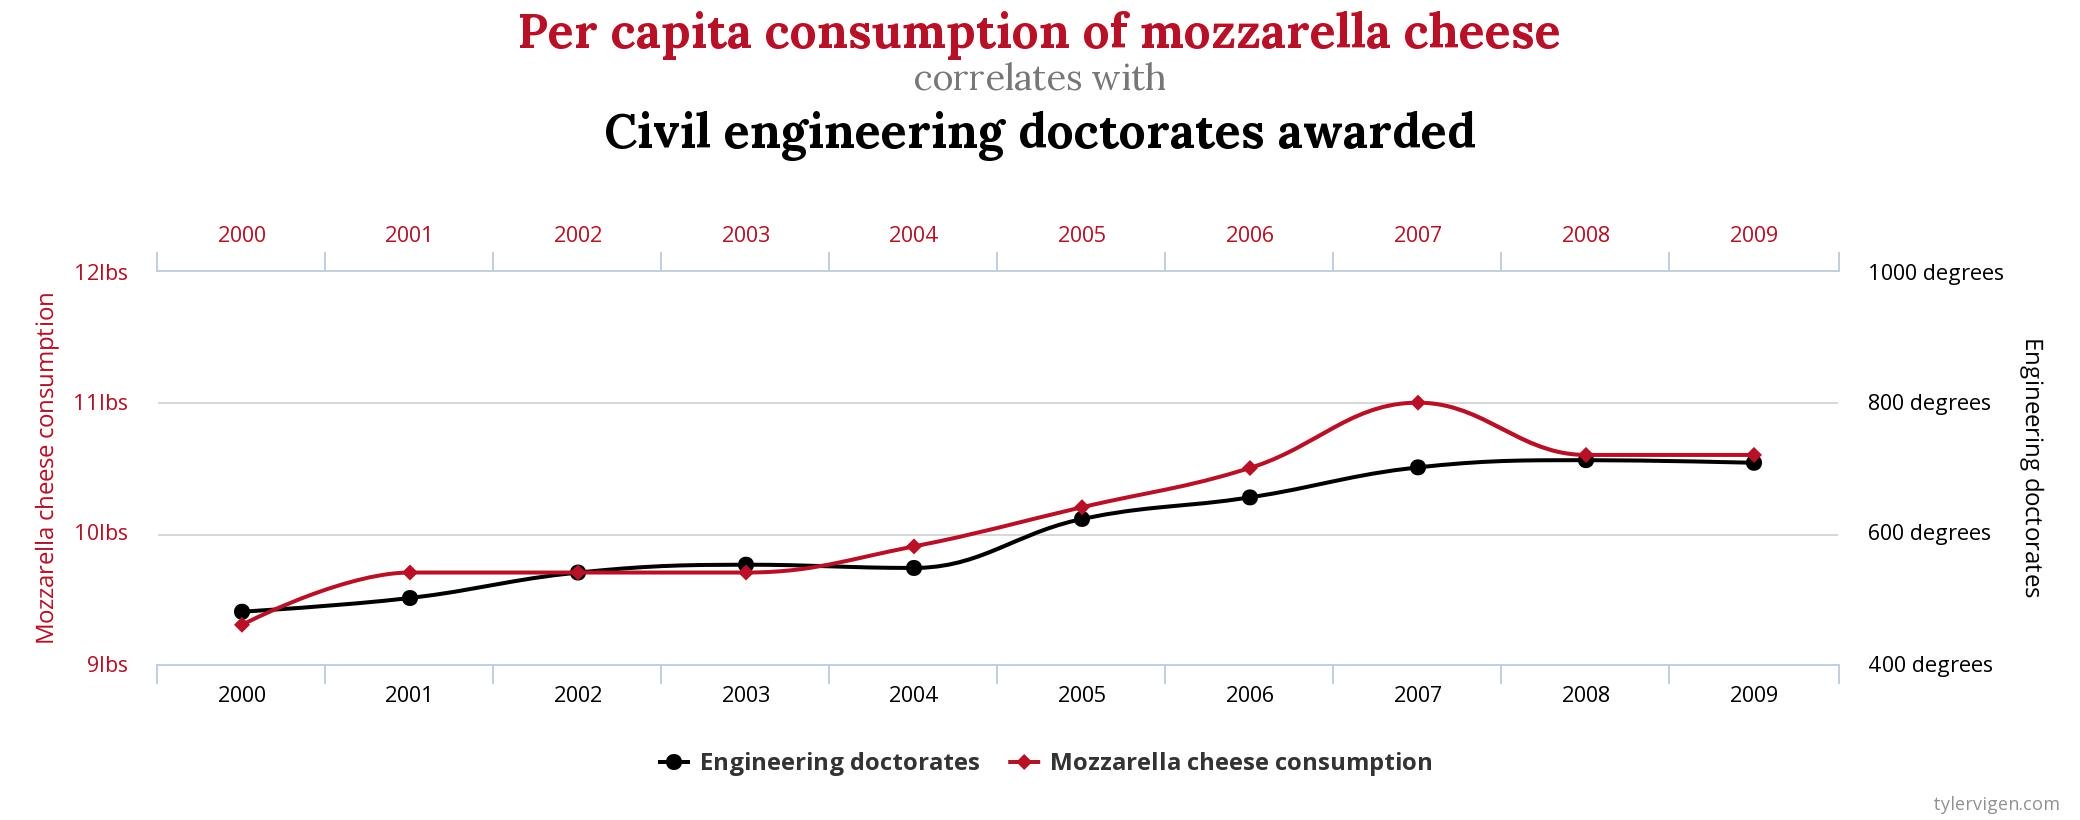

In [79]:
Image("Imagesfornotebook/cheese.jpeg")

## Correlation - the very awesome correlation matrix

In [80]:
#create a correlation matrix of numerical columns
datat = df.drop(['controln'], axis=1)
correlations_matrix = datat.corr()
correlations_matrix

,medianhv,ic1,ic4,hvp1,percapita,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,target_d
medianhv,1.000000,0.707294,0.748796,0.925311,0.745060,0.428054,-0.297028,0.743474,0.734518,0.138708,-0.011540,0.008388,0.116100
ic1,0.707294,1.000000,0.928980,0.611130,0.805221,0.166679,-0.149827,0.951409,0.974777,0.120445,-0.017006,0.118953,0.113246
ic4,0.748796,0.928980,1.000000,0.656722,0.868411,0.179921,-0.187705,0.971498,0.971909,0.132438,-0.025647,0.092771,0.131260
hvp1,0.925311,0.611130,0.656722,1.000000,0.628112,0.425179,-0.261382,0.637033,0.647854,0.128421,-0.009266,-0.008223,0.105403
percapita,0.745060,0.805221,0.868411,0.628112,1.000000,0.165962,-0.248560,0.874783,0.827514,0.141580,-0.021470,0.030901,0.137878
pobc1,0.428054,0.166679,0.179921,0.425179,0.165962,1.000000,-0.389898,0.167252,0.186805,0.068566,-0.009035,0.013852,0.039213
pobc2,-0.297028,-0.149827,-0.187705,-0.261382,-0.248560,-0.389898,1.000000,-0.162544,-0.177626,-0.075167,0.029770,0.023941,-0.072345
ic2,0.743474,0.951409,0.971498,0.637033,0.874783,0.167252,-0.162544,1.000000,0.953585,0.136096,-0.018394,0.099745,0.129964
ic3,0.734518,0.974777,0.971909,0.647854,0.827514,0.186805,-0.177626,0.953585,1.000000,0.125438,-0.023239,0.111290,0.121965
avggift,0.138708,0.120445,0.132438,0.128421,0.141580,0.068566,-0.075167,0.136096,0.125438,1.000000,-0.009504,0.014235,0.487595


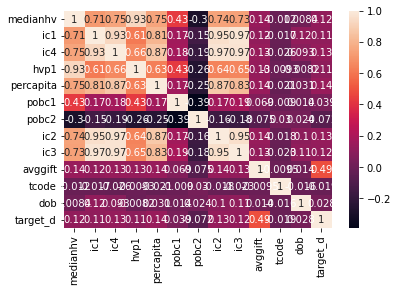

In [81]:
#create a heatmap to visually interrogate the relationships 
sns.heatmap(correlations_matrix, annot =True);

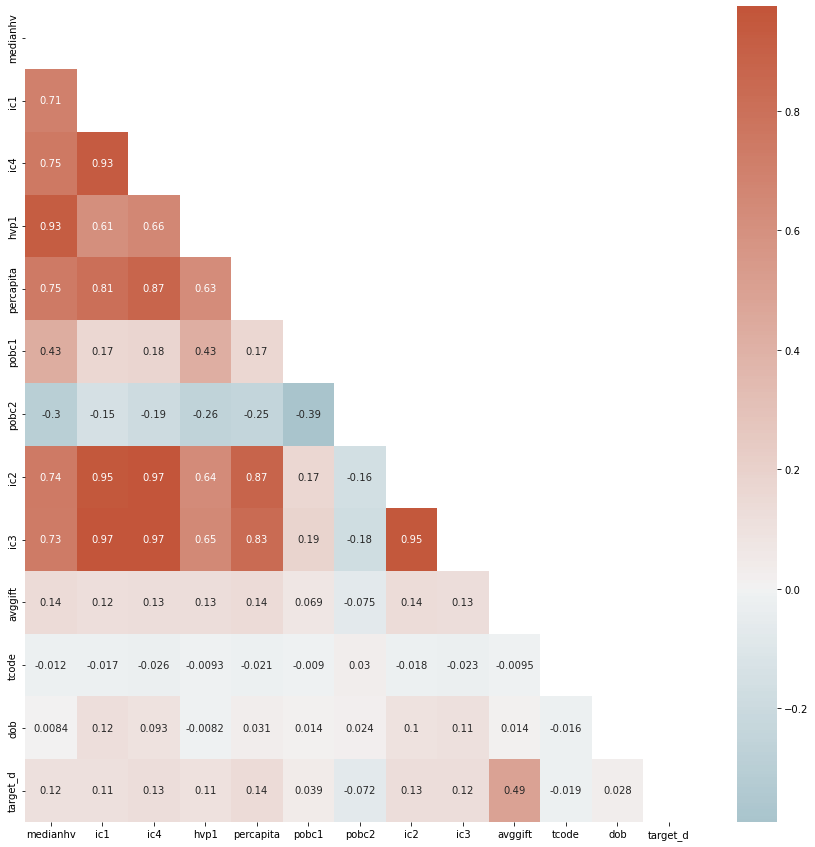

In [82]:
mask=np.zeros_like(correlations_matrix) # this numpy mask eliminates the repeated correlations in the matrix.
mask[np.triu_indices_from(mask)]=True
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(correlations_matrix, mask=mask, annot=True, center=0, 
               cmap=sns.diverging_palette(220, 20, as_cmap=True)); #since there are negative correlations, 

### What is Multicollinearity and when is it a problem? 

Multicollinearity occurs when independent variables in a regression model are highly correlated. 

This correlation is a problem because independent variables should be independent. 

If the degree of correlation between variables is high enough, it can cause problems when you fit a machine learning model and interpret the results.

example - if I was trying to predict the number of bikes that would be rented in berlin by a sample of students, having other columns in my dataset "loves cycling" and "has no bike" and "normally rents a bike" would certainly have strong multicollinearity and wouldnt really tell me anything interesting other than those columns are good predictors of bike rental. Its a bit of a so what. 

The interesting thing would be if other factors such as age, fitness, access to a vehicle, location, weather conditions could be used to make predictions. 


## Box plots 

In descriptive statistics, a box plot or boxplot (also known as box and whisker plot) is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

Box plots show the five-number summary of a set of data: including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score.

An outlier is an observation that is numerically distant from the rest of the data. Outliers can be identified easily using box plots because outliers are a data point that are visually located outside the whiskers of the box plot.

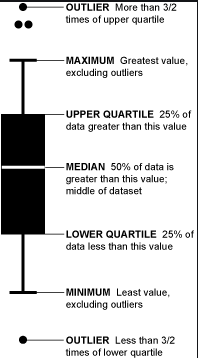

In [83]:
Image('Imagesfornotebook/boxplot.png')

<AxesSubplot:>

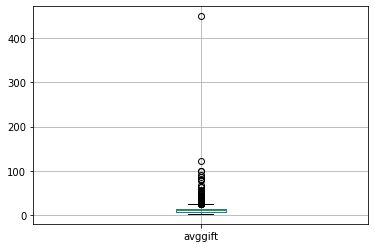

In [84]:
#standard box plot of body mass
df.boxplot('avggift')

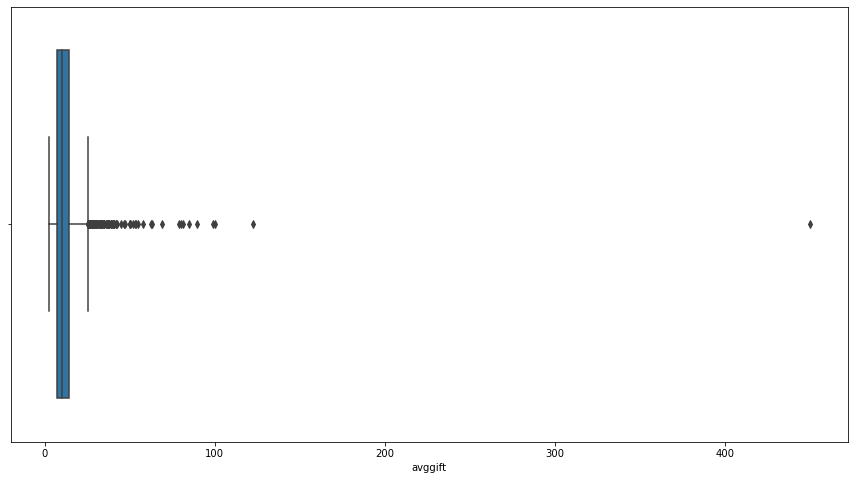

In [85]:
#seaborn horizonal boxplot of body mass- can be easier to read 
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(x=df['avggift'])

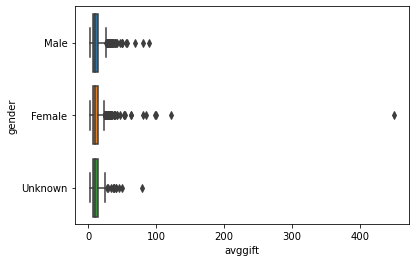

In [86]:
#shorthand to create a boxplot with multiple categories 
sns.boxplot(x='avggift', y='gender', data=df);

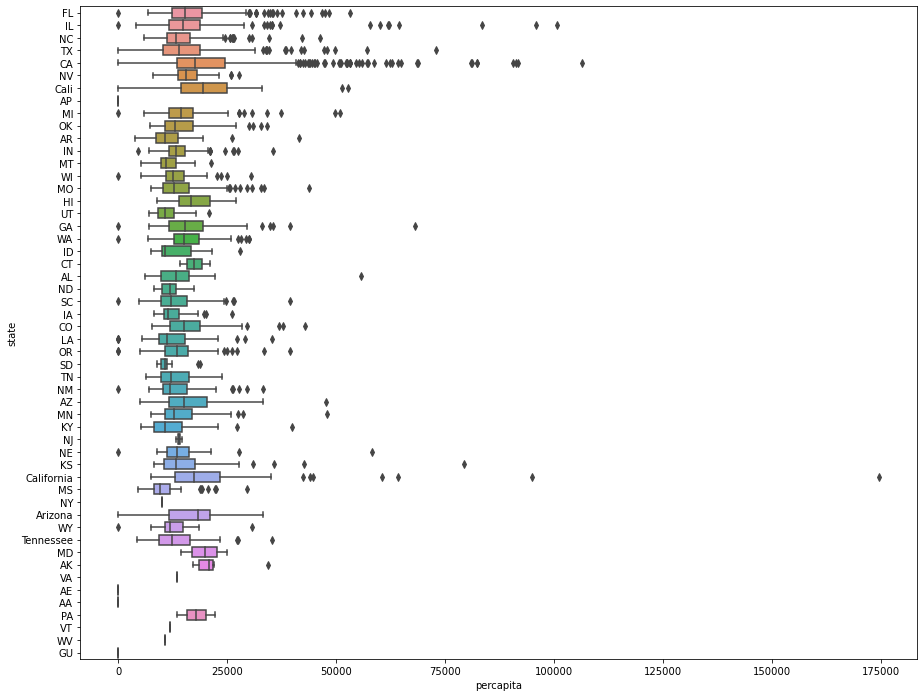

In [87]:
fig, ax = plt.subplots(figsize=(15,12))
ax = sns.boxplot(x='percapita', y='state', data=df)

TASK- summarise in bullet points what can be seen from the boxplot above:

* The percapita outlier is a female from California
* California's donors have the highest income per capita of all.
* It seems that Missouri has the lowest income per capita.

## Fix state in this data set

In [88]:
def clean_state(x):
    if x in ['Cali', 'CA', 'California']:
        return 'CA'
    elif x == 'Arizona':
        return 'AZ'
    elif x == 'Tennessee':
        return 'TN'
    else:
        return x

In [89]:
df['state']= list(map(clean_state, df['state']))

# Set the label and features & drop any unsusable features
- based on the correlation matrix (check multicollinearity)
- anything that seems not to be useful

* We will predict target_d, so y = target_d
* X will be everything else - but we might drop or process some columns  
USE A SMALL y TO NAME THE LABEL AND A BIG X FOR THE FEATURES

In [90]:
y = df['target_d']
X = df.drop('target_d', axis=1)

In [91]:
X.columns

Index(['controln', 'state', 'gender', 'medianhv', 'ic1', 'ic4', 'hvp1',
       'percapita', 'pobc1', 'pobc2', 'ic2', 'ic3', 'avggift', 'tcode', 'dob',
       'domain'],
      dtype='object')

In [92]:
X=X.drop(['controln', 'ic2', 'ic3', 'ic4', 'tcode'], axis=1)

# Pre processing X for the model

* Power transformation - scaling a feature
* Managing outliers - remove them or flag them ?
* Making strings into numbers (encoding categorical data) - This is the only thing **required** for the linear regression model
* Numerical scaling - scales all the features to have the same range

In [93]:
# Separate the numerical and categorical features
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=object)

In [94]:
X_cat = X_cat.astype(str)

In [95]:
X_num.head()

,medianhv,ic1,hvp1,percapita,pobc1,pobc2,avggift,dob
0,801.0,392,7,21975.0,6,16,28.000000,1901
1,537.0,365,0,19387.0,1,89,5.666667,0
2,725.0,301,3,18837.0,11,17,4.111111,2501
3,801.0,401,7,14014.0,1,74,27.277778,2208
4,995.0,252,0,17991.0,5,6,6.000000,0


## Encoding categories into numbers

### Technique 1: One hot encoder (creating dummy columns)

In [96]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
# best practice to raise error for NaNs, drop to select which category is the null one (all zeroes)
X_encoded = encoder.transform(X_cat).toarray()
X_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
X_encoded.shape

(3993, 65)

### Technique 2: Get dummmies

In [98]:
X_dummies = pd.get_dummies(X_cat, drop_first=True)
X_dummies

,state_AE,state_AK,state_AL,state_AP,state_AR,state_AZ,state_CA,state_CO,state_CT,state_FL,...,domain_S1,domain_S2,domain_S3,domain_T1,domain_T2,domain_T3,domain_U1,domain_U2,domain_U3,domain_U4
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3989,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3990,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3991,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Technique 3: ordinal encoding

In [99]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(X_cat)
X_ordenc = oe.transform(X_cat)
X_ordenc

array([[10.,  1.,  2.],
       [16.,  1., 11.],
       [10.,  0.,  2.],
       ...,
       [ 7.,  0., 13.],
       [ 7.,  1.,  7.],
       [22.,  1.,  5.]])

In [100]:
X_ordenc.shape 
# keeps the number of columns, just replaces it with numbers. It might add noise due to the numbers, 
# but it's much more efficient

(3993, 3)

## Numerical fields pre processing

### Removing outliers

In [101]:
iqr = np.percentile(df['percapita'], 75) - np.percentile(df['percapita'], 25)
upper_limit = np.percentile(df['percapita'], 75) + 1.5*iqr
lower_limit = np.percentile(df['percapita'], 25) - 1.5*iqr

In [102]:
df.head()

,controln,state,gender,medianhv,ic1,ic4,hvp1,percapita,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
0,44060,FL,Male,801.0,392,520.0,7,21975.0,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,Male,537.0,365,473.0,0,19387.0,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,Female,725.0,301,436.0,3,18837.0,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,Male,801.0,401,413.0,7,14014.0,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,Female,995.0,252,348.0,0,17991.0,5,6,280.0,316,6.000000,28,0,C2,5.0


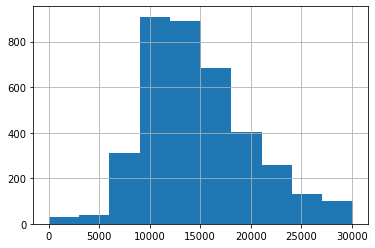

In [103]:
# We won't clean outliers in our df, thus we'll create a new variable
data_exec_out = df[(df['percapita']>lower_limit) & (df['percapita']<upper_limit)]
data_exec_out['percapita'].hist();

### Power transformation (log transformation)

<AxesSubplot:>

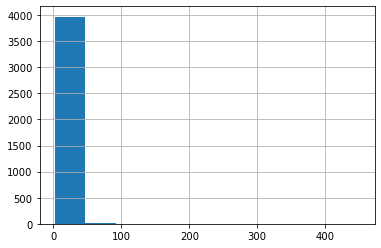

In [104]:
df['avggift'].hist()

/var/folders/yw/kfrh__c16y32fwr4ddxqhybm0000gp/T/ipykernel_25719/986525604.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num['avggift'] = list(map(log_transform_clean, df['avggift']))


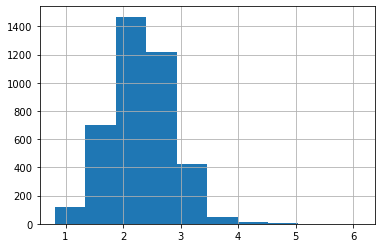

In [105]:
def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0
df['avg_list_log'] = list(map(log_transform_clean, df['avggift']))
X_num['avggift'] = list(map(log_transform_clean, df['avggift']))
df['avg_list_log'].hist();

### Scaling numerical columns - apply to X_num
- MinMaxScaler
- Normalizer
- Robust Scaler (outliers)
- Standard Scaler

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # optionally range 1-10
scaled = scaler.fit(X_num)
scaled_X_num = scaled.transform(X_num) # we input this when we bring the data together

## Bring the data frame back together

In [108]:
X_final = pd.concat((X_num, X_dummies), axis=1)

In [109]:
X_final.shape

(3993, 73)

# Train and test split

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X_final, y, test_size=0.3, random_state=40)
#random state is the seed

# Apply the model

In [111]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# Making predictions using the model

In [112]:
preds = lm.predict(X_test)

In [113]:
preds

array([20.15610269, 20.00549439, 18.16979745, ..., -0.03644172,
        1.57382925, 16.56261033])

# Evaluate the model - r2, mse

In [114]:
r2_score(y_test, preds)

0.3663764867257736

In [115]:
mean_squared_error(y_test, preds)

117.09374390674014

In [116]:
# Conclusion: that's a baseline model